# 1. Data Collection & Importing

## 1.1. Import Necessary Libraries

In [3]:
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization
import seaborn as sns  # Importing Seaborn for advanced visualizations


## 1.2. Load the Dataset

In [5]:
# Load CSV file
df = pd.read_csv("Superstore Sales Dataset.csv")

# Display first 5 rows
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

## 1.3. Inspect the Dataset

In [7]:
df.drop('Row ID', axis=1, inplace=True)

# Get a summary of dataset columns, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [8]:
# Get statistical summary of numerical columns
df.describe()

Postal Code         Sales
count   9789.000000   9800.000000
mean   55273.322403    230.769059
std    32041.223413    626.651875
min     1040.000000      0.444000
25%    23223.000000     17.248000
50%    58103.000000     54.490000
75%    90008.000000    210.605000
max    99301.000000  22638.480000

## 1.4. Check for Missing Values

In [10]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


# 2. Data Preparation 

## 2.1. Convert Columns Data Type Format

In [13]:
# Convert 'Order Date' and 'Ship Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [14]:
# Convert 'Category' column to categorical data type
df['Category'] = df['Category'].astype('category')

## 2.2. Handle Missing Values

In [16]:
# Show missing values
print(df[df['Postal Code'].isnull()])

            Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2234  CA-2018-104066 2018-12-05 2018-12-10  Standard Class    QJ-19255   
5274  CA-2016-162887 2016-11-07 2016-11-09    Second Class    SV-20785   
8798  US-2017-150140 2017-04-06 2017-04-10  Standard Class    VM-21685   
9146  US-2017-165505 2017-01-23 2017-01-27  Standard Class    CB-12535   
9147  US-2017-165505 2017-01-23 2017-01-27  Standard Class    CB-12535   
9148  US-2017-165505 2017-01-23 2017-01-27  Standard Class    CB-12535   
9386  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9387  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9388  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9389  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9741  CA-2016-117086 2016-11-08 2016-11-12  Standard Class    QJ-19255   

         Customer Name      Segment        Country        City    State  \
2234      Quincy Jones    Corporate 

In [17]:
# Alternatively, fill missing Postal Code values with 5001
df['Postal Code'] = df['Postal Code'].fillna(5001)

## 2.3. Standardize Text

### 2.3.1. Standardize Column Names

In [20]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


## 2.3.2. Standardize Text Columns

In [22]:
# Function to standardize and format text columns
def standardize_text(text):
    if isinstance(text, str):
        return '_'.join(text.strip().lower().split())  # Convert to lowercase, remove extra spaces, replace spaces with "_"
    return text

# Apply standardization to all string columns
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].applymap(standardize_text)

C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_7360\3450330121.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[string_columns] = df[string_columns].applymap(standardize_text)


In [23]:
# Print Columns names After Standardize
print (df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales'],
      dtype='object')


## 2.3.3. Use fuzzy matching to find similar product names

In [25]:
from rapidfuzz import process, fuzz

# Convert product names to lowercase and strip extra spaces for consistency
df['product_name'] = df['product_name'].str.strip().str.lower()

# Count unique Product IDs for each Product Name
product_name_check = df.groupby('product_name')['product_id'].nunique()

# Filter Product Names that have multiple Product IDs
potential_issues = product_name_check[product_name_check > 1].index.tolist()

# Use fuzzy matching to find similar product names with different IDs
similar_names = {}
for name in potential_issues:
    matches = process.extract(name, df['product_name'].unique(), limit=5, scorer=fuzz.partial_ratio)
    similar_names[name] = [match[0] for match in matches if match[0] != name and match[1] > 85]  # Threshold set to 85

# Display Results
if any(similar_names.values()):  # Check if there are matches
    for name, matches in similar_names.items():
        if matches:
            print(f"⚠️ Possible duplicate product names for '{name}': {matches}")
else:
    print("✅ No similar product names with different IDs were found.")


⚠️ Possible duplicate product names for '#10-_4_1/8"_x_9_1/2"_recycled_envelopes': ['colored_envelopes']
⚠️ Possible duplicate product names for 'avery_non-stick_binders': ['avery_5', 'avery_51', 'avery_48', 'avery_52']
⚠️ Possible duplicate product names for 'easy-staple_paper': ['staples']
⚠️ Possible duplicate product names for 'okidata_c610n_printer': ['okidata_c331dn_printer', 'okidata_mb760_printer']
⚠️ Possible duplicate product names for 'staple-based_wall_hangings': ['staples']
⚠️ Possible duplicate product names for 'staple_envelope': ['staples']
⚠️ Possible duplicate product names for 'staple_holder': ['staples']
⚠️ Possible duplicate product names for 'staple_magnet': ['staples']
⚠️ Possible duplicate product names for 'staple_remover': ['staples']
⚠️ Possible duplicate product names for 'staples': ['staples_in_misc._colors', 'staple_envelope', 'staple-based_wall_hangings', 'staple_remover']
⚠️ Possible duplicate product names for 'staples_in_misc._colors': ['staples']


## 8. Remove Duplicate Rows

### 1. Check if Each Product Name Has One Product ID

In [28]:
# Step 1: Count the number of unique Product IDs for each Product Name
product_name_check = df.groupby('product_name')['product_id'].nunique()

# Step 2: Find product names that have more than one unique Product ID
multiple_ids = product_name_check[product_name_check > 1]

# Step 3: Display results of the initial check
if multiple_ids.empty:
    print("✅ Each Product Name has only one Product ID.")
else:
    print("⚠️ Some Product Names have multiple Product IDs:")
    print(multiple_ids)

⚠️ Some Product Names have multiple Product IDs:
product_name
#10-_4_1/8"_x_9_1/2"_recycled_envelopes           2
avery_non-stick_binders                           2
easy-staple_paper                                 8
eldon_wave_desk_accessories                       2
ki_adjustable-height_table                        2
okidata_c610n_printer                             2
peel_&_seel_recycled_catalog_envelopes,_brown     2
prang_drawing_pencil_set                          2
staple-based_wall_hangings                        2
staple_envelope                                   9
staple_holder                                     3
staple_magnet                                     2
staple_remover                                    3
staples                                          10
staples_in_misc._colors                           7
storex_dura_pro_binders                           2
Name: product_id, dtype: int64


In [29]:
# Step 1: Get the most frequent Product ID for each Product Name
most_frequent_ids = (
    df.groupby('product_name')['product_id']
    .agg(lambda x: x.value_counts().idxmax())  # Select the most common Product ID
)

# Step 2: Map the most frequent Product ID to a new column
df['most_frequent_product_id'] = df['product_name'].map(most_frequent_ids)


# Step 3: Investigate problematic products
if not multiple_ids.empty:
    print("\nInvestigating problematic products...")
    
    # Ensure required columns exist; add placeholders if necessary
    if 'category' not in df.columns:
        df['category'] = "Unknown"
    if 'sub_category' not in df.columns:
        df['sub_category'] = "Unknown"

    problematic_products = df[
        df['product_name'].isin(multiple_ids.index)
    ][['product_name', 'product_id', 'category', 'sub_category']]  # Include relevant columns for context

    # Save problematic products to a CSV file for review
    problematic_products.to_csv("problematic_products.csv", index=False)
    print("Problematic products saved to 'problematic_products.csv'.")

# Step 4: Resolve inconsistencies (merge IDs using the most frequent ID)
print("\nResolving inconsistencies by merging IDs...")
df['product_id'] = df['product_name'].map(most_frequent_ids)

# Step 5: Re-check the number of unique Product IDs for each Product Name
product_name_check_after = df.groupby('product_name')['product_id'].nunique()
multiple_ids_after = product_name_check_after[product_name_check_after > 1]

# Step 6: Display final results
if multiple_ids_after.empty:
    print("\n✅ All inconsistencies resolved. Each Product Name now has only one Product ID.")
else:
    print("\n⚠️ Some Product Names still have multiple Product IDs after resolution:")
    print(multiple_ids_after)


Investigating problematic products...
Problematic products saved to 'problematic_products.csv'.

Resolving inconsistencies by merging IDs...

✅ All inconsistencies resolved. Each Product Name now has only one Product ID.


In [30]:
print(df.info())  # Verify column names and non-null counts
print(df.head())  # Inspect the first few rows of the DataFrame
print(df['most_frequent_product_id'].isna().sum())  # Check for missing values in the new column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  9800 non-null   object        
 1   order_date                9800 non-null   datetime64[ns]
 2   ship_date                 9800 non-null   datetime64[ns]
 3   ship_mode                 9800 non-null   object        
 4   customer_id               9800 non-null   object        
 5   customer_name             9800 non-null   object        
 6   segment                   9800 non-null   object        
 7   country                   9800 non-null   object        
 8   city                      9800 non-null   object        
 9   state                     9800 non-null   object        
 10  postal_code               9800 non-null   float64       
 11  region                    9800 non-null   object        
 12  product_id          

In [31]:
# Replace 'product_id' with 'most_frequent_product_id'
df['product_id'] = df['most_frequent_product_id']

# Drop the 'most_frequent_product_id' column if no longer needed
df.drop(columns=['most_frequent_product_id'], inplace=True)

# Verify the change
print(df[['product_name', 'product_id']].head())

                                        product_name       product_id
0                  bush_somerset_collection_bookcase  fur-bo-10001798
1  hon_deluxe_fabric_upholstered_stacking_chairs,...  fur-ch-10000454
2  self-adhesive_address_labels_for_typewriters_b...  off-la-10000240
3      bretford_cr4500_series_slim_rectangular_table  fur-ta-10000577
4                     eldon_fold_'n_roll_cart_system  off-st-10000760


### 2.4.2 Check if Each Product ID is Assigned to Only One Product Name

In [33]:
# Count the number of unique Product Names for each Product ID
product_id_check = df.groupby('product_id')['product_name'].nunique()

# Find Product IDs that have more than one unique Product Name
multiple_names = product_id_check[product_id_check > 1]

# Display results
if multiple_names.empty:
    print("✅ Each Product ID is linked to only one Product Name.")
else:
    print("⚠️ Some Product IDs are assigned to multiple Product Names:")
    print(multiple_names)

⚠️ Some Product IDs are assigned to multiple Product Names:
product_id
fur-bo-10002213    2
fur-ch-10001146    2
fur-fu-10001473    2
fur-fu-10004017    2
fur-fu-10004091    2
fur-fu-10004270    2
fur-fu-10004848    2
fur-fu-10004864    2
off-ap-10000576    2
off-ar-10001149    2
off-bi-10002026    2
off-bi-10004632    2
off-bi-10004654    2
off-pa-10000357    2
off-pa-10000477    2
off-pa-10000659    2
off-pa-10001166    2
off-pa-10001970    2
off-pa-10002195    2
off-pa-10002377    2
off-pa-10003022    2
off-st-10001228    2
off-st-10004950    2
tec-ac-10002049    2
tec-ac-10002550    2
tec-ac-10003832    2
tec-ma-10001148    2
tec-ph-10001530    2
tec-ph-10001795    2
tec-ph-10002200    2
tec-ph-10002310    2
tec-ph-10004531    2
Name: product_name, dtype: int64


In [34]:
# Step 1: Identify Product IDs assigned to multiple Product Names
product_id_check = df.groupby('product_id')['product_name'].nunique()
multiple_names = product_id_check[product_id_check > 1]

# Step 2: Display initial results
if multiple_names.empty:
    print("✅ Each Product ID is Assigned to Only One Product Name.")
else:
    print("⚠️ Some Product IDs are Assigned to Multiple Product Names:")
    print(multiple_names)

# Step 3: Investigate problematic Product IDs
if not multiple_names.empty:
    print("\nInvestigating problematic Product IDs...")
    
    # Ensure required columns exist; add placeholders if necessary
    if 'category' not in df.columns:
        df['category'] = "Unknown"
    if 'sub_category' not in df.columns:
        df['sub_category'] = "Unknown"

    problematic_products = df[
        df['product_id'].isin(multiple_names.index)
    ][['product_id', 'product_name', 'category', 'sub_category']]  # Include relevant columns for context

    # Save problematic products to a CSV file for review
    problematic_products.to_csv("problematic_product_ids.csv", index=False)
    print("Problematic Product IDs saved to 'problematic_product_ids.csv'.")

# Step 4: Resolve inconsistencies (merge names using the most frequent name)
print("\nResolving inconsistencies by merging Product Names...")

# Get the most frequent Product Name for each Product ID
most_frequent_names = (
    df.groupby('product_id')['product_name']
    .agg(lambda x: x.value_counts().idxmax())  # Select the most common Product Name
)

# Map the most frequent Product Name back to the DataFrame
df['product_name'] = df['product_id'].map(most_frequent_names)

# Step 5: Re-check the number of unique Product Names for each Product ID
product_id_check_after = df.groupby('product_id')['product_name'].nunique()
multiple_names_after = product_id_check_after[product_id_check_after > 1]

# Step 6: Display final results
if multiple_names_after.empty:
    print("\n✅ All inconsistencies resolved. Each Product ID is Assigned to Only One Product Name.")
else:
    print("\n⚠️ Some Product IDs are still Assigned to Multiple Product Names:")
    print(multiple_names_after)

⚠️ Some Product IDs are Assigned to Multiple Product Names:
product_id
fur-bo-10002213    2
fur-ch-10001146    2
fur-fu-10001473    2
fur-fu-10004017    2
fur-fu-10004091    2
fur-fu-10004270    2
fur-fu-10004848    2
fur-fu-10004864    2
off-ap-10000576    2
off-ar-10001149    2
off-bi-10002026    2
off-bi-10004632    2
off-bi-10004654    2
off-pa-10000357    2
off-pa-10000477    2
off-pa-10000659    2
off-pa-10001166    2
off-pa-10001970    2
off-pa-10002195    2
off-pa-10002377    2
off-pa-10003022    2
off-st-10001228    2
off-st-10004950    2
tec-ac-10002049    2
tec-ac-10002550    2
tec-ac-10003832    2
tec-ma-10001148    2
tec-ph-10001530    2
tec-ph-10001795    2
tec-ph-10002200    2
tec-ph-10002310    2
tec-ph-10004531    2
Name: product_name, dtype: int64

Investigating problematic Product IDs...
Problematic Product IDs saved to 'problematic_product_ids.csv'.

Resolving inconsistencies by merging Product Names...

✅ All inconsistencies resolved. Each Product ID is Assigned to

In [35]:
print(df.info())  # Verify column names and non-null counts
print(df.head())  # Inspect the first few rows of the DataFrame
print(df['product_id'].isna().sum())  # Check for missing values in the new column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9800 non-null   object        
 1   order_date     9800 non-null   datetime64[ns]
 2   ship_date      9800 non-null   datetime64[ns]
 3   ship_mode      9800 non-null   object        
 4   customer_id    9800 non-null   object        
 5   customer_name  9800 non-null   object        
 6   segment        9800 non-null   object        
 7   country        9800 non-null   object        
 8   city           9800 non-null   object        
 9   state          9800 non-null   object        
 10  postal_code    9800 non-null   float64       
 11  region         9800 non-null   object        
 12  product_id     9800 non-null   object        
 13  category       9800 non-null   category      
 14  sub-category   9800 non-null   object        
 15  product_name   9800 n

### 2.4.3 Check Row Duplicate

In [37]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Aggregating duplicate rows...")

    # Identify all duplicate rows (including the original and copies)
    duplicated_rows = df[df.duplicated(keep=False)]

    # Define aggregation rules for each column
    aggregation_rules = {
        'order_date': 'first',  # Keep the first order date
        'ship_date': 'last',  # Keep the last ship date
        'ship_mode': 'first',  # Keep the first shipping mode
        'customer_name': 'first',  # Keep the first customer name
        'segment': 'first',  # Keep the first segment
        'country': 'first',  # Keep the first country
        'city': 'first',  # Keep the first city
        'state': 'first',  # Keep the first state
        'postal_code': 'first',  # Keep the first postal code
        'region': 'first',  # Keep the first region
        'category': 'first',  # Keep the first category
        'sub-category': 'first',  # Keep the first sub-category
        'product_name': lambda x: ', '.join(x.unique()),  # Concatenate unique product names
        'sales': 'sum',  # Sum up sales for duplicate rows
    }

    # Group by unique identifiers and apply aggregation only on duplicate rows
    aggregated_duplicates = duplicated_rows.groupby(['order_id', 'customer_id', 'product_id'], as_index=False).agg(aggregation_rules)

    # Remove all duplicate rows from the original DataFrame
    df_cleaned = df.drop_duplicates(keep=False)

    # Concatenate the cleaned DataFrame with the aggregated duplicates
    df = pd.concat([df_cleaned, aggregated_duplicates], ignore_index=True)

    print(f"Duplicate rows aggregated. New DataFrame shape: {df.shape}")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1
Aggregating duplicate rows...
Duplicate rows aggregated. New DataFrame shape: (9799, 18)


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9799 non-null   object        
 1   order_date     9799 non-null   datetime64[ns]
 2   ship_date      9799 non-null   datetime64[ns]
 3   ship_mode      9799 non-null   object        
 4   customer_id    9799 non-null   object        
 5   customer_name  9799 non-null   object        
 6   segment        9799 non-null   object        
 7   country        9799 non-null   object        
 8   city           9799 non-null   object        
 9   state          9799 non-null   object        
 10  postal_code    9799 non-null   float64       
 11  region         9799 non-null   object        
 12  product_id     9799 non-null   object        
 13  category       9799 non-null   category      
 14  sub-category   9799 non-null   object        
 15  product_name   9799 n

## 2.5 Filter out outliers 

In [40]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit
    
    # Filter out rows with outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to the 'sales' column
df_cleaned = remove_outliers_iqr(df, 'sales')

# Check summary statistics before applying outlier removal
print("Before Outlier Removal:")
print(df['sales'].describe())

# Check summary statistics after applying outlier removal
print("\nAfter Outlier Removal:")
print(df_cleaned['sales'].describe())

Before Outlier Removal:
count     9799.000000
mean       230.792610
std        626.692409
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: sales, dtype: float64

After Outlier Removal:
count    8653.000000
mean       93.169840
std       114.670861
min         0.444000
25%        15.008000
50%        40.784000
75%       124.360000
max       500.240000
Name: sales, dtype: float64


In [41]:
# Function to calculate the IQR for each category and filter products exceeding the upper bound
def identify_outliers_by_category(df):
    # Group by category and calculate Q1, Q3, and IQR for each category
    outliers = []
    for category, group in df.groupby('category'):
        Q1 = group['sales'].quantile(0.25)
        Q3 = group['sales'].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        # Identify products with sales above the upper bound for each category
        outliers_in_category = group[group['sales'] > upper_bound]
        outliers_in_category = outliers_in_category[['product_name', 'sales', 'category']]
        
        # Remove rows with NaN in product_name
        outliers_in_category = outliers_in_category.dropna(subset=['product_name'])
        
        # Append the results
        outliers.append(outliers_in_category)
    
    # Concatenate the results for all categories
    return pd.concat(outliers)

# Apply the function to find outliers
outliers = identify_outliers_by_category(df)

# Check if there are outliers
if outliers.empty:
    print("✅ No products exceed the upper bound in any category.")
else:
    # Sort outliers by sales in descending order
    outliers_sorted = outliers.sort_values(by='sales', ascending=False)

    print("⚠️ Products with sales higher than the upper bound in their respective categories:")
    print(outliers_sorted)

⚠️ Products with sales higher than the upper bound in their respective categories:
                                           product_name      sales  \
2697  cisco_telepresence_system_ex90_videoconferenci...  22638.480   
6824              canon_imageclass_2200_advanced_copier  17499.950   
8151              canon_imageclass_2200_advanced_copier  13999.960   
2623              canon_imageclass_2200_advanced_copier  11199.968   
4188              canon_imageclass_2200_advanced_copier  10499.970   
...                                                 ...        ...   
3419                                         xerox_1991    182.720   
5289  snap-a-way_black_print_carbonless_ruled_speed_...    182.112   
7262   boston_1799_powerhouse_electric_pencil_sharpener    181.860   
3174   boston_1799_powerhouse_electric_pencil_sharpener    181.860   
3317  boston_19500_mighty_mite_electric_pencil_sharp...    181.350   

             category  
2697       Technology  
6824       Technology  
8151

C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_7360\1535412655.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for category, group in df.groupby('category'):


## 2.6. Normalize

In [43]:
# Assuming 'df' is your original DataFrame

# 1. Creating the Customers DataFrame
customers = df[['customer_id', 'customer_name', 'segment']].drop_duplicates()

# 2. Creating the Branches DataFrame
Location = df[['country', 'city', 'state', 'postal_code', 'region']].drop_duplicates()
Location['loc_id'] = range(1, len(Location) + 1)  # Automatically assigning branch_id
# Reorder columns to move 'branch_id' to the first position
Location = Location[['loc_id', 'country', 'city', 'state', 'postal_code', 'region']]

# 3. Creating the Products DataFrame
# Standardize column names (replace hyphens with underscores)
products = df[['product_id', 'product_name', 'category', 'sub-category']].drop_duplicates()
products.rename(columns={'sub-category': 'sub_category'}, inplace=True)  # Replace hyphen with underscore

# 4. Creating the Orders DataFrame
orders = df[['order_id', 'order_date', 'ship_date', 'ship_mode', 
             'customer_id', 'country', 'city', 'state', 'postal_code']].drop_duplicates()

# Merge with branches to assign branch_id
orders = orders.merge(Location, on=['country', 'city', 'state', 'postal_code'], how='left')

# Reorder columns to move 'branch_id' after 'customer_id'
orders = orders[['order_id', 'order_date', 'ship_date', 'ship_mode', 
                 'customer_id', 'loc_id', 'country', 'city', 'state', 'postal_code']]


# 5. Creating the OrderDetails DataFrame (Bridge Table)
order_details = df[['order_id', 'product_id', 'sales']].drop_duplicates()

# Drop unnecessary columns from the 'orders' DataFrame
orders = orders.drop(columns=['country', 'city', 'state', 'postal_code'])

# Verify the updated columns in the 'orders' DataFrame
print("Updated Columns in Orders DataFrame:")
print(orders.columns.tolist())

Updated Columns in Orders DataFrame:
['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'loc_id']


In [44]:
# Display first 5 rows
print(customers.head())
print(Location.head())
print(products.head())
print(orders.head())
print(order_details.head())

   customer_id    customer_name    segment
0     cg-12520      claire_gute   consumer
2     dv-13045  darrin_van_huff  corporate
3     so-20335   sean_o'donnell   consumer
5     bh-11710  brosina_hoffman   consumer
12    aa-10480     andrew_allen   consumer
    loc_id        country             city           state  postal_code region
0        1  united_states        henderson        kentucky      42420.0  south
2        2  united_states      los_angeles      california      90036.0   west
3        3  united_states  fort_lauderdale         florida      33311.0  south
5        4  united_states      los_angeles      california      90032.0   west
12       5  united_states          concord  north_carolina      28027.0  south
        product_id                                       product_name  \
0  fur-bo-10001798                  bush_somerset_collection_bookcase   
1  fur-ch-10000454  hon_deluxe_fabric_upholstered_stacking_chairs,...   
2  off-la-10000240  self-adhesive_address_labels_

In [45]:
# 1. Export Customers DataFrame to CSV
customers.to_csv("customers.csv", index=False)
print("Customers data saved to 'customers.csv'.")

# 2. Export Branches DataFrame to CSV
Location.to_csv("branches.csv", index=False)
print("Branches data saved to 'branches.csv'.")

# 3. Export Products DataFrame to CSV
products.to_csv("products.csv", index=False)
print("Products data saved to 'products.csv'.")

# 4. Export Orders DataFrame to CSV
orders.to_csv("orders.csv", index=False)
print("Orders data saved to 'orders.csv'.")

# 5. Export OrderDetails DataFrame to CSV
order_details.to_csv("order_details.csv", index=False)
print("OrderDetails data saved to 'order_details.csv'.") 

Customers data saved to 'customers.csv'.
Branches data saved to 'branches.csv'.
Products data saved to 'products.csv'.
Orders data saved to 'orders.csv'.
OrderDetails data saved to 'order_details.csv'.


In [46]:
# Define the base directory where you want to save the files
base_directory = r"D:\sales project\Analysis\Python Analysis\Sales Project By Python"

# 1. Export Customers DataFrame to CSV
customers.to_csv(f"{base_directory}\\customers.csv", index=False)
print("Customers data saved to 'customers.csv'.")

# 2. Export Branches DataFrame to CSV
Location.to_csv(f"{base_directory}\\branches.csv", index=False)
print("Location data saved to 'branches.csv'.")

# 3. Export Products DataFrame to CSV
products.to_csv(f"{base_directory}\\products.csv", index=False)
print("Products data saved to 'products.csv'.")

# 4. Export Orders DataFrame to CSV
orders.to_csv(f"{base_directory}\\orders.csv", index=False)
print("Orders data saved to 'orders.csv'.")

# 5. Export OrderDetails DataFrame to CSV
order_details.to_csv(f"{base_directory}\\order_details.csv", index=False)
print("OrderDetails data saved to 'order_details.csv'.")

Customers data saved to 'customers.csv'.
Branches data saved to 'branches.csv'.
Products data saved to 'products.csv'.
Orders data saved to 'orders.csv'.
OrderDetails data saved to 'order_details.csv'.


# 3. Exploratory Data Analysis (EDA)

## 3.1. Summary Statistics

In [49]:
# Sales distribution by category
print(df.groupby('category')['sales'].describe())

                  count        mean          std    min    25%      50%  \
category                                                                  
Furniture        2077.0  350.822617   501.626947  1.892  47.12  182.550   
Office Supplies  5909.0  119.381001   383.761427  0.444  11.76   27.360   
Technology       1813.0  456.401474  1116.818701  0.990  67.98  167.944   

                     75%        max  
category                             
Furniture        435.999   4416.174  
Office Supplies   79.470   9892.740  
Technology       453.576  22638.480  


C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_7360\656462362.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('category')['sales'].describe())


## 3.2. Visualize Outliers

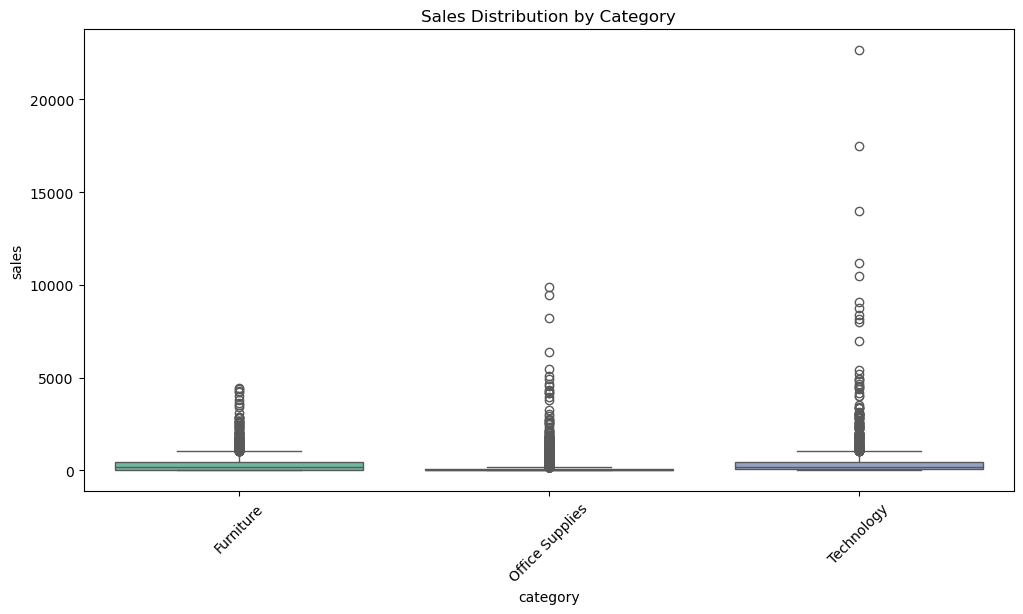

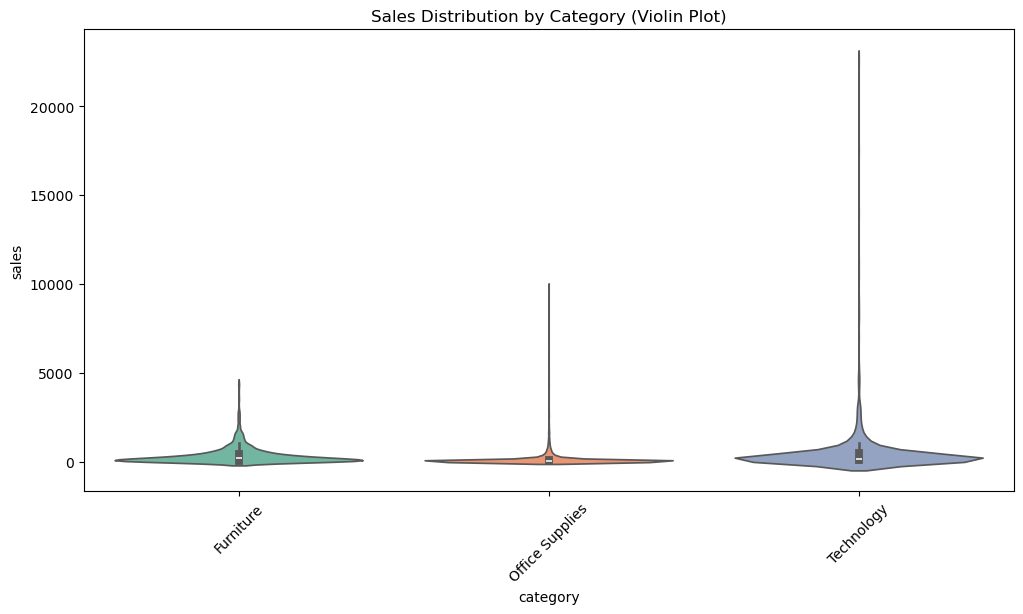

In [51]:
# Boxplot (fixed syntax for Seaborn v0.14.0+)
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='sales', data=df, palette="Set2", hue='category', legend=False)
plt.title("Sales Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# Violin plot (fixed syntax for Seaborn v0.14.0+)
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='sales', data=df, palette="Set2", hue='category', legend=False)
plt.title("Sales Distribution by Category (Violin Plot)")
plt.xticks(rotation=45)
plt.show()

## 3.3. Deeper Insights

In [53]:
# Summary statistics for sales
print(df['sales'].describe())

# Total and average sales
total_sales = df['sales'].sum()
average_sales = df['sales'].mean()
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${average_sales:,.2f}")


count     9799.000000
mean       230.792610
std        626.692409
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: sales, dtype: float64
Total Sales: $2,261,536.78
Average Sales: $230.79


In [54]:
# Sales by region (replace 'region' with 'state' if available)
regional_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print(regional_sales)

region
west       710219.6845
east       669518.7260
central    492646.9132
south      389151.4590
Name: sales, dtype: float64


In [55]:
# Sales by product category
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
print(category_sales)

category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: sales, dtype: float64


C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_7360\3352670558.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)


## 3.4. visualizations

In [57]:
import plotly.express as px
# Mapping of standardized state names to abbreviations
state_abbreviations = {
    'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR',
    'california': 'CA', 'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE',
    'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL',
    'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA',
    'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI',
    'minnesota': 'MN', 'mississippi': 'MS', 'missouri': 'MO', 'montana': 'MT',
    'nebraska': 'NE', 'nevada': 'NV', 'new_hampshire': 'NH', 'new_jersey': 'NJ',
    'new_mexico': 'NM', 'new_york': 'NY', 'north_carolina': 'NC', 'north_dakota': 'ND',
    'ohio': 'OH', 'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA', 'rhode_island': 'RI',
    'south_carolina': 'SC', 'south_dakota': 'SD', 'tennessee': 'TN', 'texas': 'TX',
    'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA', 'west_virginia': 'WV',
    'wisconsin': 'WI', 'wyoming': 'WY', 'district_of_columbia': 'DC'
}

# Convert full state names to abbreviations
df['state'] = df['state'].map(state_abbreviations)

# Ensure all states are present
all_states = pd.DataFrame({'state': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']})

# Aggregate sales by state
state_sales = df.groupby('state')['sales'].sum().reset_index()

# Merge to include all states, filling missing values with 0
state_sales = all_states.merge(state_sales, on='state', how='left').fillna(0)

# Create the choropleth map
fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='sales',
    scope="usa",
    title='Sales Distribution by State (USA)',
    color_continuous_scale="Viridis"
)
fig.update_geos(showland=True, landcolor="lightgray", showlakes=True, lakecolor="blue")
fig.show()

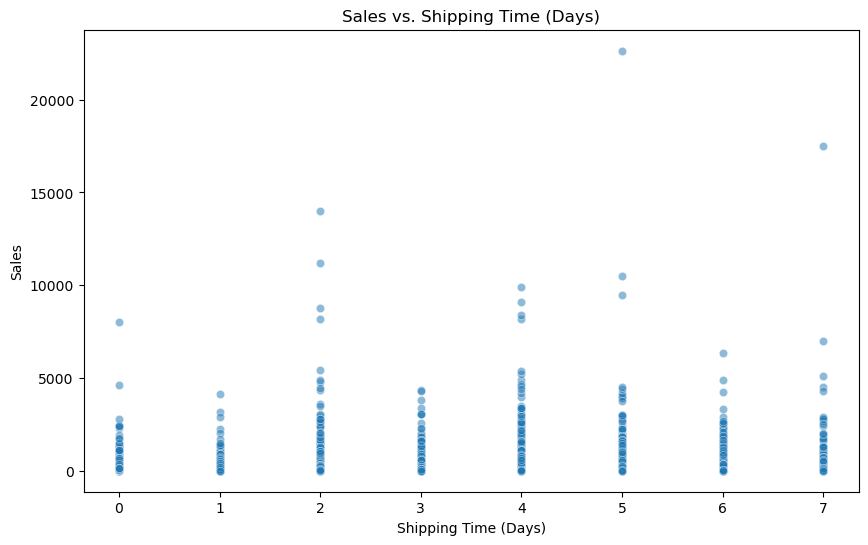

In [58]:
df['shipping_time_days'] = (df['ship_date'] - df['order_date']).dt.days
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time_days', y='sales', data=df, alpha=0.5)
plt.title("Sales vs. Shipping Time (Days)")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Sales")
plt.show()

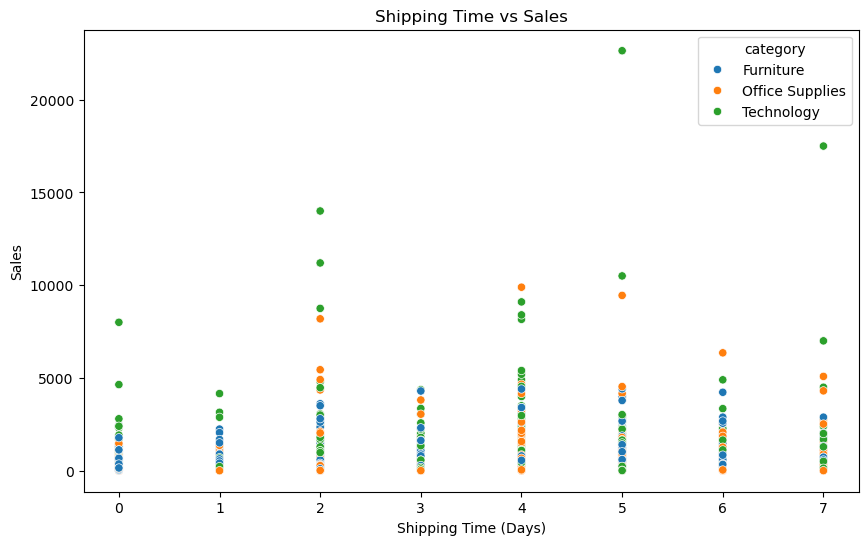

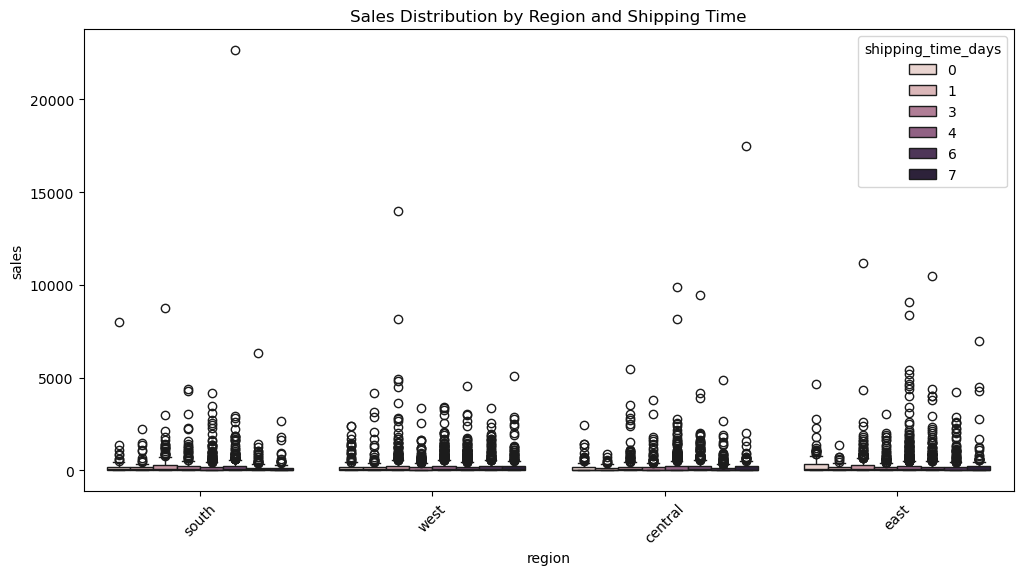

In [59]:
# Scatter plot for shipping_time_days vs sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time_days', y='sales', data=df, hue='category')
plt.title("Shipping Time vs Sales")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Sales")
plt.show()

# Box plot for shipping_time_days vs sales by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='sales', hue='shipping_time_days', data=df)
plt.title("Sales Distribution by Region and Shipping Time")
plt.xticks(rotation=45)
plt.show()

# 4.Data Transformation & Feature Engineering

## 4.1. Extract Date Features

In [62]:
# Extract year, month, and day from order_date
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day

# Calculate shipping time (in days)
df['shipping_time_days'] = (df['ship_date'] - df['order_date']).dt.days

# Display the new features
print(df[['order_date', 'ship_date', 'shipping_time_days', 'order_year', 'order_month','order_day']].head())

  order_date  ship_date  shipping_time_days  order_year  order_month  \
0 2017-11-08 2017-11-11                   3        2017           11   
1 2017-11-08 2017-11-11                   3        2017           11   
2 2017-06-12 2017-06-16                   4        2017            6   
3 2016-10-11 2016-10-18                   7        2016           10   
4 2016-10-11 2016-10-18                   7        2016           10   

   order_day  
0          8  
1          8  
2         12  
3         11  
4         11  


## 4.2. Create Calculated Columns

In [64]:
# Example: Calculate total sales per customer
customer_sales = df.groupby('customer_id')['sales'].sum().reset_index()
customer_sales.rename(columns={'sales': 'total_customer_sales'}, inplace=True)

# Merge back into the main DataFrame
df = df.merge(customer_sales, on='customer_id', how='left')

# Display the new feature
print(df[['customer_id', 'total_customer_sales']].head())

  customer_id  total_customer_sales
0    cg-12520             1148.7800
1    cg-12520             1148.7800
2    dv-13045             1119.4830
3    so-20335             2602.5755
4    so-20335             2602.5755


## 4.3. Normalize or Standardize Numeric Columns

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'sales' column
df['sales_normalized'] = scaler.fit_transform(df[['sales']])

# Display the normalized values
print(df[['sales', 'sales_normalized']].head())

      sales  sales_normalized
0  261.9600          0.011552
1  731.9400          0.032313
2   14.6200          0.000626
3  957.5775          0.042280
4   22.3680          0.000968


## 4.4. Encode Categorical Variables

In [68]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['category', 'sub-category', 'region'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())

         order_id order_date  ship_date       ship_mode customer_id  \
0  ca-2017-152156 2017-11-08 2017-11-11    second_class    cg-12520   
1  ca-2017-152156 2017-11-08 2017-11-11    second_class    cg-12520   
2  ca-2017-138688 2017-06-12 2017-06-16    second_class    dv-13045   
3  us-2016-108966 2016-10-11 2016-10-18  standard_class    so-20335   
4  us-2016-108966 2016-10-11 2016-10-18  standard_class    so-20335   

     customer_name    segment        country             city state  ...  \
0      claire_gute   consumer  united_states        henderson    KY  ...   
1      claire_gute   consumer  united_states        henderson    KY  ...   
2  darrin_van_huff  corporate  united_states      los_angeles    CA  ...   
3   sean_o'donnell   consumer  united_states  fort_lauderdale    FL  ...   
4   sean_o'donnell   consumer  united_states  fort_lauderdale    FL  ...   

   sub-category_labels sub-category_machines sub-category_paper  \
0                False                 False     

In [69]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Encode the 'segment' column
df['segment_encoded'] = encoder.fit_transform(df['segment'])

# Display the encoded column
print(df[['segment', 'segment_encoded']].head())

     segment  segment_encoded
0   consumer                0
1   consumer                0
2  corporate                1
3   consumer                0
4   consumer                0


## 4.5. Aggregate Data for Insights

In [71]:
# Total sales by category
category_sales = df.groupby('category')['sales'].sum().reset_index()
category_sales.rename(columns={'sales': 'total_category_sales'}, inplace=True)

# Total sales by region
region_sales = df.groupby('region')['sales'].sum().reset_index()
region_sales.rename(columns={'sales': 'total_region_sales'}, inplace=True)

# Merge aggregated features back into the main DataFrame
df = df.merge(category_sales, on='category', how='left')
df = df.merge(region_sales, on='region', how='left')

# Display the new aggregated features
print(df[['category', 'total_category_sales', 'region', 'total_region_sales']].head())

          category  total_category_sales region  total_region_sales
0        Furniture           728658.5757  south         389151.4590
1        Furniture           728658.5757  south         389151.4590
2  Office Supplies           705422.3340   west         710219.6845
3        Furniture           728658.5757  south         389151.4590
4  Office Supplies           705422.3340  south         389151.4590


C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_7360\2394340360.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## 4.6. Handle Outliers

In [73]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'shipping_time_days'
df_cleaned = remove_outliers_iqr(df, 'shipping_time_days')

# Compare before and after outlier removal
print("Before Outlier Removal:")
print(df['shipping_time_days'].describe())
print("\nAfter Outlier Removal:")
print(df_cleaned['shipping_time_days'].describe())

Before Outlier Removal:
count    9799.000000
mean        3.961118
std         1.749703
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: shipping_time_days, dtype: float64

After Outlier Removal:
count    9799.000000
mean        3.961118
std         1.749703
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: shipping_time_days, dtype: float64


## 4.7. Split Data into Training and Testing Sets

In [75]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['order_year', 'order_month', 'shipping_time_days', 'total_customer_sales']]
y = df['sales']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (7839, 4)
Testing set size: (1960, 4)


# 5.Data Analysis & Insights Extraction

## 5.1. Key Performance Indicators (KPIs)

### 5.1.1. Total Sales

In [79]:
total_sales = df['sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $2,261,536.78


### 5.1.2. Average Sales

In [81]:
average_sales = df['sales'].mean()
print(f"Average Sales: ${average_sales:,.2f}")

Average Sales: $230.79


### 5.1.3. Top-Selling Products

In [83]:
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:")
print(top_products)

Top 10 Products by Sales:
product_name
canon_imageclass_2200_advanced_copier                                          61599.824
fellowes_pb500_electric_punch_plastic_comb_binding_machine_with_manual_bind    27453.384
cisco_telepresence_system_ex90_videoconferencing_unit                          22638.480
hon_5400_series_task_chairs_for_big_and_tall                                   21870.576
gbc_docubind_tl300_electric_binding_system                                     19823.479
gbc_ibimaster_500_manual_proclick_binding_system                               19024.500
hewlett_packard_laserjet_3310_copier                                           18839.686
hp_designjet_t520_inkjet_large_format_printer_-_24"_color                      18374.895
gbc_docubind_p400_electric_binding_system                                      17965.068
high_speed_automatic_electric_letter_opener                                    17030.312
Name: sales, dtype: float64


### 5.1.4. Regional Sales Breakdown

In [85]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print("Sales by Region:")
print(region_sales)

Sales by Region:
region
west       710219.6845
east       669518.7260
central    492646.9132
south      389151.4590
Name: sales, dtype: float64


### 5.1.5. Customer Segment Analysis

In [87]:
segment_sales = df.groupby('segment')['sales'].sum().sort_values(ascending=False)
print("Sales by Customer Segment:")
print(segment_sales)

Sales by Customer Segment:
segment
consumer       1.148061e+06
corporate      6.884941e+05
home_office    4.249822e+05
Name: sales, dtype: float64


## 2. Trend Analysis

### 2.2.1. Sales Over Time

In [90]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

# Monthly sales trend
monthly_sales = df.groupby(['order_year', 'order_month'])['sales'].sum().reset_index()
print(monthly_sales)

# Visualize monthly sales trend
import plotly.express as px
fig = px.line(monthly_sales, x='order_month', y='sales', color='order_year', title="Monthly Sales Trend")
fig.show()

    order_year  order_month        sales
0         2015            1   14205.7070
1         2015            2    4519.8920
2         2015            3   55205.7970
3         2015            4   27906.8550
4         2015            5   23644.3030
5         2015            6   34322.9356
6         2015            7   33781.5430
7         2015            8   27117.5365
8         2015            9   81623.5268
9         2015           10   31453.3930
10        2015           11   77907.6607
11        2015           12   68167.0585
12        2016            1   18066.9576
13        2016            2   11951.4110
14        2016            3   32339.3184
15        2016            4   34154.4685
16        2016            5   29959.5305
17        2016            6   23599.3740
18        2016            7   28608.2590
19        2016            8   36818.3422
20        2016            9   63133.6060
21        2016           10   31011.7375
22        2016           11   75249.3995
23        2016  

### 5.2.2. Product Category Trends

In [92]:
category_trends = df.groupby(['category', 'order_year'])['sales'].sum().reset_index()
print(category_trends)

# Visualize category trends
fig = px.bar(category_trends, x='order_year', y='sales', color='category', title="Sales Trends by Category")
fig.show()

           category  order_year        sales
0         Furniture        2015  156477.8811
1         Furniture        2016  164053.8674
2         Furniture        2017  195813.0400
3         Furniture        2018  212313.7872
4   Office Supplies        2015  149512.8200
5   Office Supplies        2016  133124.4070
6   Office Supplies        2017  182417.5660
7   Office Supplies        2018  240367.5410
8        Technology        2015  173865.5070
9        Technology        2016  162257.7310
10       Technology        2017  221961.9440
11       Technology        2018  269370.6910


C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_7360\843351102.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## 5.3. Statistical Analysis

### 5.3.1. Correlation Matrix

In [95]:
numeric_columns = ['sales', 'shipping_time_days', 'postal_code']
if 'profit' in df.columns:
    numeric_columns.append('profit')
if 'quantity' in df.columns:
    numeric_columns.append('quantity')

corr_matrix = df[numeric_columns].corr()
print(corr_matrix)

                       sales  shipping_time_days  postal_code
sales               1.000000           -0.005711    -0.025615
shipping_time_days -0.005711            1.000000    -0.009376
postal_code        -0.025615           -0.009376     1.000000


### 5.3.2. Hypothesis Testing

In [97]:
from scipy.stats import f_oneway

# Perform ANOVA test
regions = df['region'].unique()
sales_by_region = [df[df['region'] == region]['sales'] for region in regions]
f_stat, p_value = f_oneway(*sales_by_region)

print(f"F-statistic: {f_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in sales between regions.")
else:
    print("No significant difference in sales between regions.")

F-statistic: 0.9011821229386157, p-value: 0.4396648653568087
No significant difference in sales between regions.


## 5.4. Outlier Analysis

### 5.4.1. Identify High-Value Transactions

In [100]:
high_value_sales = df[df['sales'] > df['sales'].quantile(0.99)]
print("High-Value Transactions:")
print(high_value_sales[['product_name', 'sales', 'region']])

High-Value Transactions:
                                           product_name     sales   region
27    riverside_palais_royal_lawyers_bookcase,_royal...  3083.430     east
165           lexmark_mx611dhe_monochrome_laser_printer  8159.952  central
251                  logitech_p710e_mobile_speakerphone  3347.370     west
262           lexmark_mx611dhe_monochrome_laser_printer  3059.982  central
263   xerox_workcentre_6505dn_laser_multifunction_pr...  2519.958  central
...                                                 ...       ...      ...
9423       hon_5400_series_task_chairs_for_big_and_tall  3785.292     east
9637  chromcraft_bull-nose_wood_oval_conference_tabl...  4297.644    south
9647              dmi_eclipse_executive_suite_bookcases  3406.664     west
9658                            samsung_galaxy_mega_6.3  3023.928     west
9739  riverside_palais_royal_lawyers_bookcase,_royal...  4404.900     east

[98 rows x 3 columns]


### 5.4.2. Analyze Shipping Times

   shipping_time_days       sales
0                   0  236.894173
1                   1  183.746874
2                   2  277.107123
3                   3  205.097288
4                   4  228.759576
5                   5  229.254844
6                   6  201.461437
7                   7  266.950228


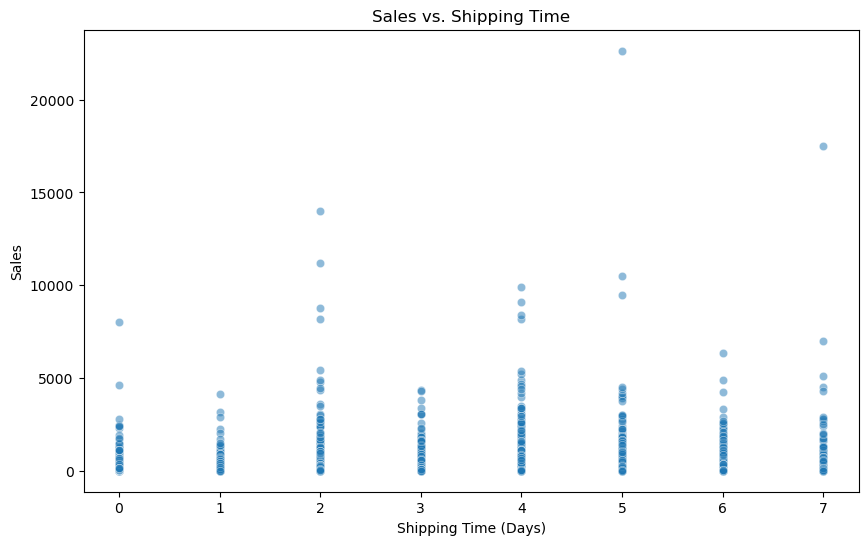

In [102]:
shipping_time_analysis = df.groupby('shipping_time_days')['sales'].mean().reset_index()
print(shipping_time_analysis)

# Visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time_days', y='sales', data=df, alpha=0.5)
plt.title("Sales vs. Shipping Time")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Sales")
plt.show()

## 5.5. Geographic Insights

### 5.5.1. Sales by State

In [105]:
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False)
print("Sales by State:")
print(state_sales)

# Visualize using a choropleth map
fig = px.choropleth(state_sales.reset_index(), 
                    locations='state',
                    locationmode='USA-states',
                    color='sales',
                    scope="usa",
                    title='Sales Distribution by State (USA)')
fig.show()

Sales by State:
state
CA    446306.4635
NY    306361.1470
TX    168572.5322
WA    135206.8500
PA    116276.6500
FL     88436.5320
IL     79236.5170
MI     76136.0740
OH     75130.3500
VA     70636.7200
NC     55165.9640
IN     48718.4000
GA     48219.1100
KY     36458.3900
AZ     35272.6570
NJ     34610.9720
CO     31841.5980
WI     31173.4300
TN     30661.8730
MN     29863.1500
MA     28634.4340
DE     27322.9990
MD     23705.5230
RI     22525.0260
MO     22205.1500
OK     19683.3900
AL     19510.6400
OR     17284.4620
NV     16729.1020
CT     13384.3570
AR     11678.1300
UT     11220.0560
MS     10771.3400
LA      9131.0500
VT      8929.3700
SC      8481.7100
NE      7464.9300
NH      7292.5240
MT      5589.3520
NM      4783.5220
IA      4443.5600
ID      4382.4860
KS      2914.3100
DC      2865.0200
WY      1603.1360
SD      1315.5600
ME      1270.5300
WV      1209.8240
ND       919.9100
Name: sales, dtype: float64


## 5.6. Insights

### 5.6.1. Interactive Dashboard

In [108]:
# Example: Streamlit Dashboard (save as app.py)
import streamlit as st
import pandas as pd

st.title("Sales Analysis Dashboard")
st.write("## Monthly Sales Trend")
st.line_chart(monthly_sales)

st.write("## Regional Sales Performance")
st.bar_chart(region_sales)

2025-04-05 07:58:16.584 
  command:

    streamlit run C:\Users\Aboelyazzed\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

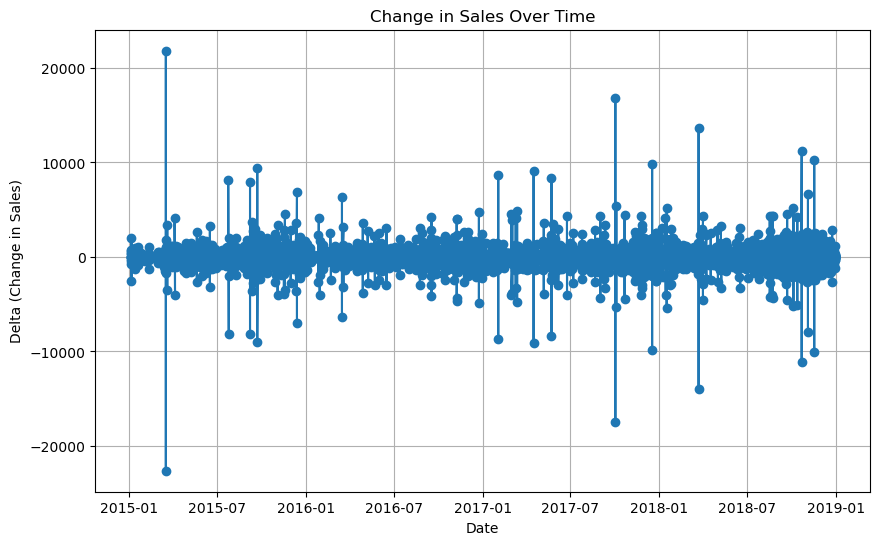

In [109]:
class DeltaGenerator:
    def __init__(self, data, date_column, value_column):
        self.data = data
        self.date_column = date_column
        self.value_column = value_column

    def calculate_deltas(self):
        # Sort data by date
        self.data = self.data.sort_values(by=self.date_column)
        # Calculate the difference between consecutive rows
        self.data['delta'] = self.data[self.value_column].diff()
        return self.data

    def plot_deltas(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(self.data[self.date_column], self.data['delta'], marker='o')
        plt.title("Change in Sales Over Time")
        plt.xlabel("Date")
        plt.ylabel("Delta (Change in Sales)")
        plt.grid(True)
        plt.show()

# Example usage
df['order_date'] = pd.to_datetime(df['order_date'])
delta_gen = DeltaGenerator(df, date_column='order_date', value_column='sales')
df_with_deltas = delta_gen.calculate_deltas()
delta_gen.plot_deltas()

# 6.Forecasting

## 6.1.Prepare the Data for Forecasting

In [112]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate sales by month
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

# Display the aggregated data
print(monthly_sales.head())

  order_date      sales
0 2015-01-01  14205.707
1 2015-02-01   4519.892
2 2015-03-01  55205.797
3 2015-04-01  27906.855
4 2015-05-01  23644.303


## 6.2. Visualize the Time Series

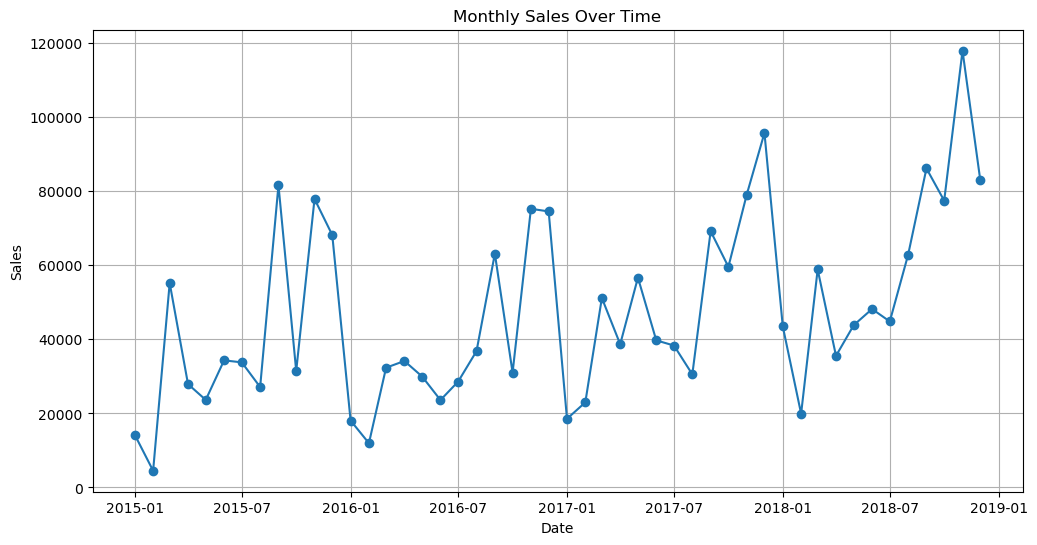

In [114]:
# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## 6.3. Decompose the Time Series

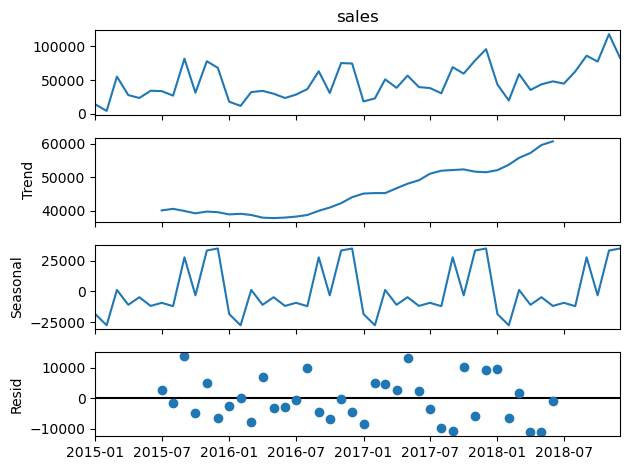

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(monthly_sales.set_index('order_date')['sales'], model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.show()

## 6.4. Choose a Forecasting Model

### 6.4.1: ARIMA

In [119]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit ARIMA model
model = ARIMA(monthly_sales['sales'], order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)

48    77882.535842
49    82080.050366
50    78363.673696
51    77562.297662
52    90178.601100
53    84479.482539
54    83175.392773
55    85201.846388
56    82194.773321
57    81241.336983
58    84496.723791
59    83333.201659
Name: predicted_mean, dtype: float64


### 6.4.2: Prophet

07:58:24 - cmdstanpy - INFO - Chain [1] start processing
07:58:25 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
48 2018-12-31   40916.277906   32079.723155   50033.914281
49 2019-01-31   27223.271177   18306.841836   37270.438986
50 2019-02-28  109599.772422  100221.641002  119031.926127
51 2019-03-31   37759.849273   28000.883626   47374.827107
52 2019-04-30   35918.504583   27079.151967   45935.890115
53 2019-05-31   69053.588624   59629.554166   79021.447420
54 2019-06-30   54169.807315   43813.193148   63948.371269
55 2019-07-31   46565.572090   37846.939554   56136.125441
56 2019-08-31  118629.732794  109226.249615  128112.005297
57 2019-09-30   65062.450646   56047.978340   75024.356860
58 2019-10-31  120758.788312  111499.504837  130341.695175
59 2019-11-30   76224.267374   66927.449033   85521.442275


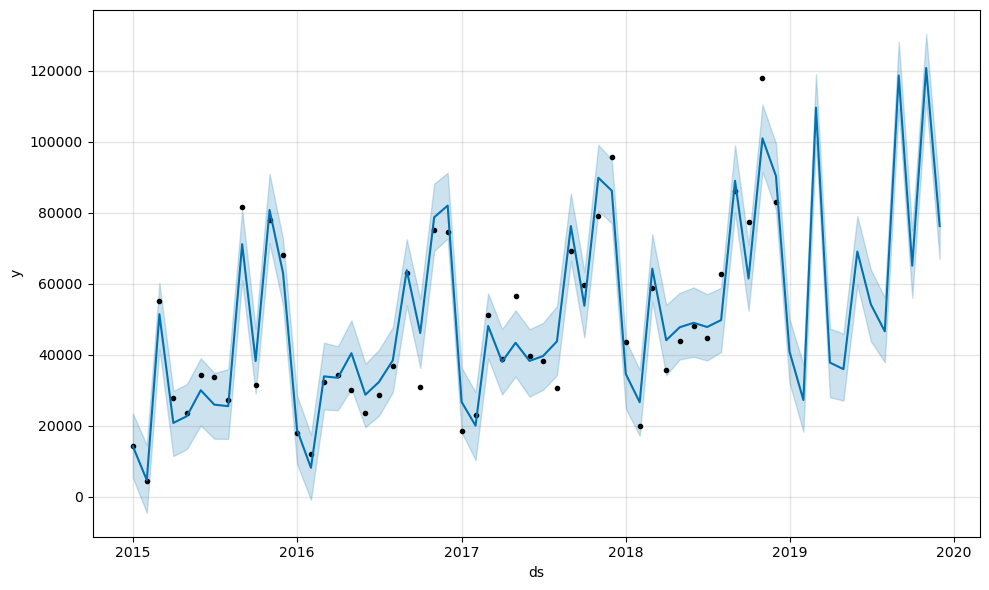

In [121]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = monthly_sales.rename(columns={'order_date': 'ds', 'sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='ME')  # Use 'ME' instead of 'M'

# Make predictions
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

# Plot the forecast
model.plot(forecast)
plt.show()

## 6.5. Evaluate the Model

In [123]:
from sklearn.metrics import mean_absolute_error

# Split data into train and test sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Fit ARIMA on training data
model = ARIMA(train['sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast on test data
predictions = model_fit.forecast(steps=len(test))

# Calculate MAE
mae = mean_absolute_error(test['sales'], predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 24071.07181000625
